<a href="https://colab.research.google.com/github/darioblandon/Curso1/blob/main/S9/S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

<p><a name="contents"></a></p>

# Contenido Sesión 10

- <a href="#dTrees">1. Árboles de decisión.</a><br>
- <a href="#rForest">2. Bosques aleatorios.</a><br>
- <a href="#kMeans">3. Clustering: k-means</a><br>

<p><a name="dTrees"></a></p>

# 1. Árboles de decisión

[[Contenidos]](#contents)

Los árboles de decisión son algoritmos que pueden ser usados tanto para clasificación como para regresión. Consisiten en una secuencia de preguntas si/sinó (if/else) que llevan a la decisión final.






Suponga que se desea clasificar, con la menor cantidad de preguntas posibles, los siguientes cuatro animales: Águila (Hawk), Pingüino (Penguin), Delfín (Dolphin) y Oso (Bear). Tan solo haciendo tres preguntas, en dos niveles, es posible identificar a que animal corresponde. Observe el siguiente diagrama.



<p><img alt="Colaboratory logo" height="300px" src="https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s10/desTreeAnimals.png" align="center" hspace="10px" vspace="0px"></p>



En lenguaje de ML podemos decir entonces que tenemos cuatro clases: Águila (Hawk), Pingüino (Penguin), Delfín (Dolphin) y Oso (Bear) y son necesarias las siguientes tres características para poder hacer la calsificación: tener plumas, poder volar y tener aletas. Cada nodo del digrama anterior es llamado hoja (*leaf*)

In [ ]:
! pip3 install mglearn==0.1.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mglearn-0.1.9-py2.py3-none-any.whl
  Attempting uninstall: mglearn
    Found existing installation: mglearn 0.1.8
    Uninstalling mglearn-0.1.8:
      Successfully uninstalled mglearn-0.1.8


In [ ]:
from sklearn.datasets import *
import numpy as np

import matplotlib.pyplot as plt
#import mglearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(400, noise=0.1, random_state=10)

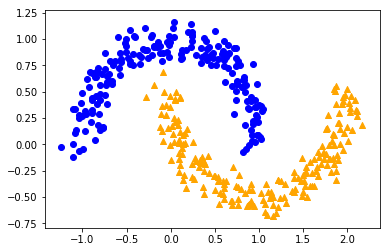

In [ ]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="blue")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="orange", marker='^')

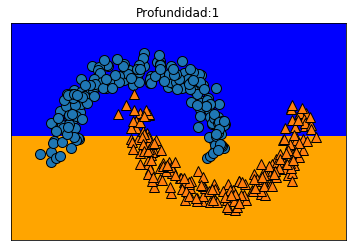

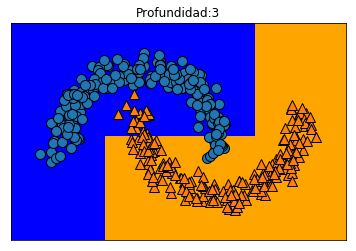

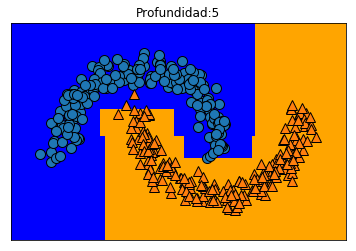

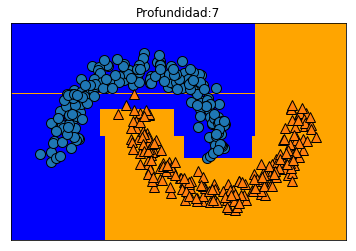

In [ ]:
from matplotlib.colors import ListedColormap
for i in range(1,9, 2):
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(X,y)

  plt.figure()
  mglearn.plots.plot_2d_classification(dt,X,fill=True, cm=ListedColormap(['blue','orange']))
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
  plt.title('Profundidad:'+str(i))
  plt.show()

La predicción de a qué clase pertenece un punto, depende entonces del lugar donde se encuentre en el espacio de características y pertenece a la clase mayoritaría, si solo hay una clase mayoritaria se dice que la hoja es pura (*pure leaf*). Veamos el digrama de árbol con profundidad 7 para ver como se hizo la clasificación.


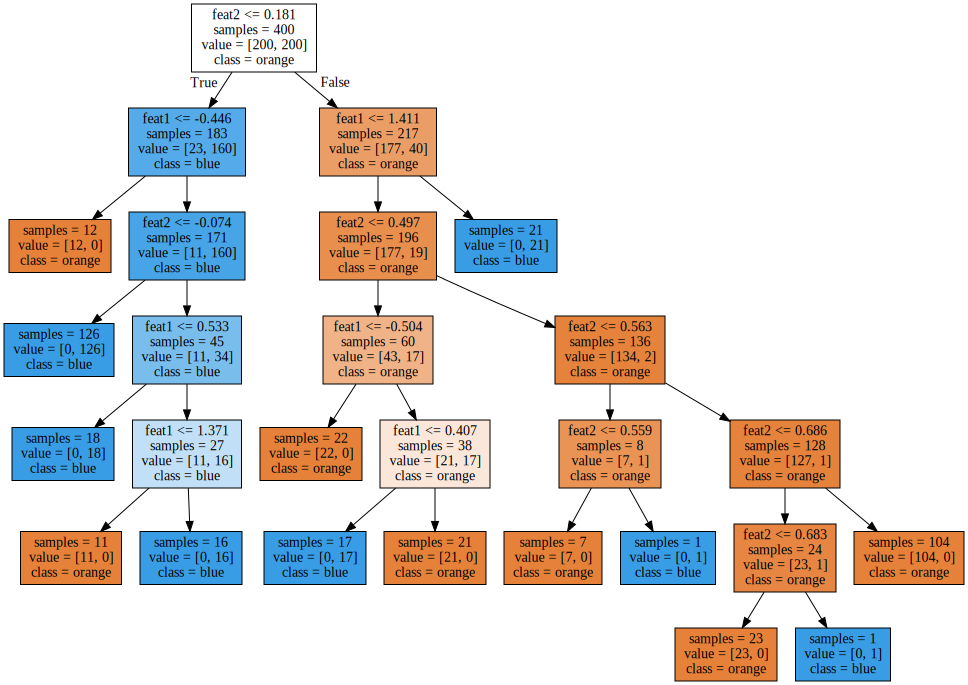

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt, out_file="tree.dot", class_names=["orange", "blue"],
  feature_names=["feat1", "feat2"], impurity=False, filled=True)

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)


Note que si el árbol evoluciona hasta que solo se tengan hojas puras, esto corresponde a un modelo de muy alta complejidad lo cual conlleva la aparición de sobreajuste, tal y como se ve en la figura de clasificación con profundidad 7. 


Existen dos estrategias comunes para prevenir el sobreajuste. La primera, llamada pre-podado (pre-pruning), consiste en detener la evolución del árbol, por ejemplo limitando el número de capas (profundidad), el número de hojas o exigiendo un número mínimo de puntos por nodo para proceder a dividirlo. La segunda estrategia se llama post-podado (post-pruning), la cual consiste en remover o fusionar nodos que contienen poca información. La primera se puede implementar facilmente en sklearn con alguno de los hiperparámetros `max_depth` (profundidad del árbol), `max_leaf_nodes` (número máximo de nodos hoja), o `min_samples_split` (número mínimo de muestras que debe tener el nodo antes de dividise), entre otros. Normalmente, fijando alguno de esos parámetros es suficiente para evitar el sobreajuste. 

Veamos ahora el método usado por los árboles de decisión para tomar la importancia de las características. Existen dos métodos principales: usando el coeficiente de Gini o la entropía. Para seleccionar el método a usar en `sklearn` podemos invocar `criterion='gini'` o `criterion='entropy'`.

Sin entrar en detalle matemáticos, podemos decir que ambas métricas evalúan la inhomogeneidad de los datos. El objetivo es entonces encontrar las características que permitan obtener nodos más puros, es decir, menos inhomogéneos en cada etapa de la decisión. Para ver la importancia de las caracteríticas es posible usar `feature_importances_`. Para el ejemplo de juguete que hemos venído trabajando veamos la importancia de las carcterísticas. 



In [ ]:
dt.feature_importances_

array([0.45779901, 0.54220099])

Vemos entonces que la segunda caraterística tiene mayor importancia que la primera, por eso el árbol mostrado en la diagrama de decisión de la figura de arriba inicia con esta caraterística.

Veamos ahora la importancia de carateríticas para un dataset mas complejo como el de cancer.

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_can=cancer.data
y_can=cancer.target
X_can.shape, y_can.shape

((569, 30), (569,))

In [ ]:
X_can[y_can==0].shape

(212, 30)

In [ ]:
cancer.feature_names[22]

'worst perimeter'

In [ ]:
from sklearn.model_selection import train_test_split
X_can_train, X_can_test, y_can_train, y_can_test = train_test_split(X_can, y_can, test_size=0.3, random_state=1)

In [ ]:
cancerTree=DecisionTreeClassifier().fit(X_can_train,y_can_train)
cancerTree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01064558,
       0.        , 0.        , 0.02222751, 0.        , 0.        ,
       0.00352815, 0.        , 0.00893956, 0.        , 0.        ,
       0.02896418, 0.        , 0.        , 0.00715165, 0.00858198,
       0.00965473, 0.09089597, 0.78864361, 0.        , 0.        ,
       0.        , 0.        , 0.02076709, 0.        , 0.        ])

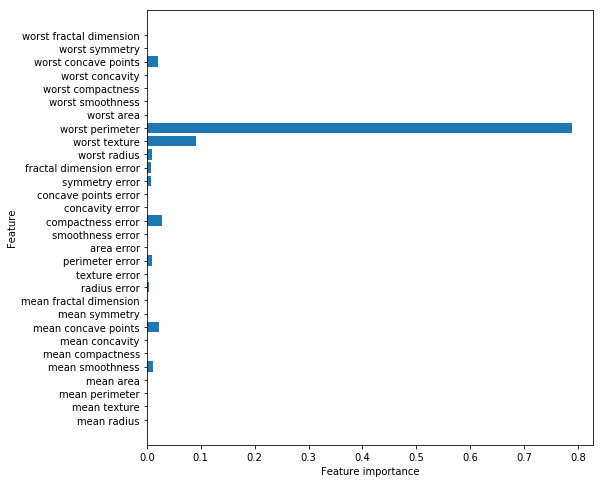

In [ ]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.figure(figsize=(8,8))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  
plot_feature_importances_cancer(cancerTree)

In [ ]:
from sklearn import metrics
y_can_pred = cancerTree.predict(X_can_test)
print("Accuracy:",metrics.accuracy_score(y_can_test, y_can_pred))

Accuracy: 0.9649122807017544


Podemos decir como conclusión que los árboles de desición tienen dos ventajas respecto a los demás algoritmos. El modelo resultante puede ser comprendido y visualizado fácilmente y los algoritmos son independientes de la escala de los datos.

Por otro lado, la principal falencia es que los árboles de decisión suelen tender a sobreajustar los datos, incluso cuando se aplica el  pre-podado. Para evitarlo, es posible utilizar métodos de conjunto (ensemble methods) como los que veremos a continuación.

<p><a name="rForest"></a></p>

# 2. Bosques aleatorios.

[[Contenidos]](#contents)

Llamamos método de ensamble a los métodos en los cuales se unen diferentes tipos de algorítmos o el mísmo algorítmo multiples veces con el fin de crear un predictor más robusto.

El método de bosques aleatorios no implementa un algorítmo de ML nuevo, como dijimos, en realidad es un ensamble de árboles de desición en el cual el entrenamiento se realiza mediante bootstraping y la desición final se toma con la moda (para clasificación) o la media (para regresión) de las predicciones de cada árbol.



![](http://www.globalsoftwaresupport.com/wp-content/uploads/2018/02/ggff5544hh.png)

Existen varias ventajas de usar un bosque aleatorio:


*   Se usa bootstraping de los datos de entrenamiento, ésto hace que sea difícil sobreajustar los árboles, por el contrario ésto hace que cada árbol disminuya su varianza y al usar el metodo de "votación" se cancelan los sesgos. **Los bosques aleatorios son excelentes en el bias-variance tradeoff**.
*   Es un método muy robusto respecto al ruido en los datos.
*   Puede tenerse la importancia relativa de las carácterísticas, lo cual nos permite hacer selección de las mísmas para hacer reducción dimensional.
*   Puede entrenarse en paralelo cada árbol.

Eso si, tiene algunas desventajas:


*   Al ser un método de ensamble puede ser muy costoso computacionalmente, tanto para entrenamiento como para predicción.
*   Su interpretabilidad no es tan simple como la de un sólo árbol.




**Ejemplo:** Usemos un bosque aleatorio denuevo sobre el dataset de cancer:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cancerForest = RandomForestClassifier(n_estimators=500)
cancerForest = cancerForest.fit(X_can_train,y_can_train)
cancerForest.feature_importances_

array([0.04862427, 0.01536952, 0.0565668 , 0.05693541, 0.00553411,
       0.0080763 , 0.04850875, 0.0792377 , 0.00330927, 0.0032866 ,
       0.01153818, 0.00405489, 0.01343476, 0.03367665, 0.00338135,
       0.00396878, 0.00449519, 0.00538046, 0.00276601, 0.00379103,
       0.10307524, 0.01632812, 0.14169273, 0.11804312, 0.01029486,
       0.01913386, 0.03108922, 0.13526603, 0.00866063, 0.00448017])

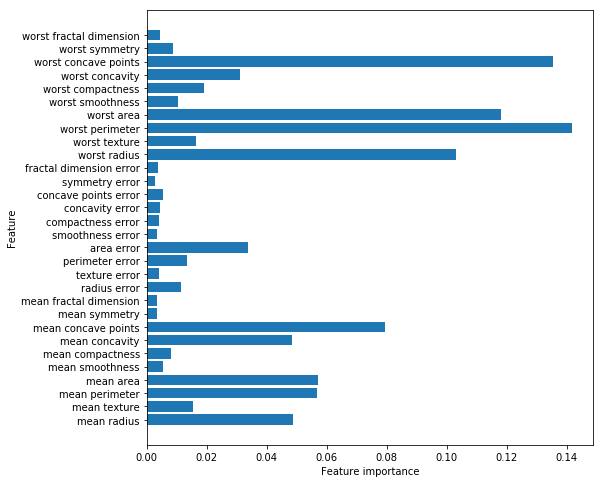

In [ ]:
plot_feature_importances_cancer(cancerForest)

In [ ]:
y_can_pred = cancerForest.predict(X_can_test)
print("Accuracy:",metrics.accuracy_score(y_can_test, y_can_pred))

Accuracy: 0.9415204678362573


Note que al usar el bosque aleatorio las carácteristicas que en el árbol parecían no tener importancia ahora si tienen algún tipo de importancia, ésto se debe al bootstraping, con el cual la varianza en las muestras es mayor y por tanto se extrae más información (más estadística) de nuestros datos.
Además note el aumento en la precisión del modelo.

**Nota:** Recuerde que al clasificar el bosque aleatorio predice la moda de las clases predichas por los árboles que lo componen, si lo que se desea es hacer regresión el bosque predice la media de las predicciones dadas por los árboles. En ese caso debe importar el estimador RandomForestRegressor (`from sklearn.ensemble import RandomForestRegressor`).

## Ejercicio 1:

Imagine que es un investigador médico que recopila datos para un estudio. Ha recopilado datos sobre un conjunto de pacientes, todos los cuales padecían la misma enfermedad. Durante su curso de tratamiento, cada paciente respondió a uno de los 5 medicamentos, Medicamento A, Medicamento B, Medicamento c, Medicamento x e y.

Parte de su trabajo es construir un modelo para descubrir qué medicamento podría ser apropiado para un futuro paciente con la misma enfermedad. Los conjuntos de características de este conjunto de datos son la edad (age), el sexo (sex), la presión arterial (BP), el colesterol de los pacientes (Cholesterol), y la razón entre la concentración de sodio y potasio en la sangre (Na_to_K). La variable objetivo es el medicamento al que respondió cada paciente.

**1**. Construya un árbol de decisión para predecir la clase de droga a prescribir para un nuevo paciente.

**2**. Construya un modelo utilizando bosques aleatorios.


### Ejercicio 2.

1. Importe el dataset Iris del módulo `sklearn.datasets` como `load_iris` y seleccione sólo las últimas dos características (el dataset contiene 4 características), correspondientes a "petal lenght" y "petal width". Recuerde que se accede a las características y etiquetas mediante los atributos `data` y `target`, respectivamente.
2. Divida los datos en los conjuntos de entrenamiento y prueba. Busque el valor óptimo para el hiperparámetro `max_depth` en el rango (2,10) y entrene el modelo con este valor.
3. Realice una visualización del árbol utilizando el método Graphviz
4. Utilice el método `classification_report` para ver el rendimiento del modelo y grafique la matriz de confusión correspondiente.
5. Utilice el método GridSearch para buscar los valores óptimos de los hiperparámetros `max_depth` y `min_samples_split` en el rango (2,10), y entrene un modelo de Bosques Aleatorios con estos valores utilizando 100 árboles de decisión.
6. Realice una evaluación del rendimiento del modelo con el método `classification_report` y la matriz de confusión. Compare con los resultados obtenidos con el árbol de decisión.

<p><a name="kMeans"></a></p>

# 3. Aprendizaje No supervisado: Agrupamiento mediante k-means

[[Contenidos]](#contents)

El **principal** reto en el aprendizaje no supervisado consiste en evaluar cuándo un algoritmo aprende algo útil. Los algoritmos no supervisados se usan, normalmente, en datos de los cuales no se tiene etiquetas, de tal forma que no sabemos cual debe ser la salida correcta. Por tal motivo, resulta muy dificil identificar cuando un modelo se desempeña bien. Por ejemplo, supongamos que una plataforma debe usar un algoritmo para organizar las fotos que se suben a un sitio web; nuestro algoritmo de agrupamiento hipotético podría haber agrupado todas las imágenes que muestran caras en el perfil y todas las imágenes de cara completa. Sin duda, esta sería una forma posible de dividir una colección de imágenes de los rostros de las personas, pero no sería adecuada si queremos organizar las fotos que contengan a todos nuestros amigos, por ejemplo. Sin embargo, no hay forma de que "digamos" al algoritmo lo que estamos buscando, por lo que, a menudo, la única forma de evaluar el resultado de un algoritmo no supervisado es inspeccionarlo manualmente.

Como consecuencia, los algoritmos no supervisados pueden ser usados en una fase exploratoria, como parte de un sistema automático más grande. Otra aplicación común para algoritmos no supervisados es como un paso de preprocesamiento para algoritmos supervisados. El aprendizaje de una nueva representación de los datos a veces puede mejorar la precisión de los algoritmos supervisados, o puede conducir a una reducción de la memoria y el consumo de tiempo. 

A continuación veremos uno de los algoritmos no supervisados de agrupamiento, conocido como `k-means`.

# Clustering:

El *Clustering* corresponde a la tarea de particionar el dataset en grupos, los cuales son llamados *clusters*. El objetivo consiste en separar los datos de tal forma que los puntos dentro de un cluster sean muy similares y se diferencien con puntos de otros clusters. De forma similar a los algoritmos de clasificación, los algoritmos de agrupamiento asignan (o predicen) un número a cada punto de los datos, lo que indica a qué cluster pertenece un punto en particular.

## k-Means Clustering

La agrupación *k-means* es uno de los algoritmos de agrupación más simples y más usados. Mediante éste, se intenta encontrar los centros de los clusters que sean representativos de ciertas regiones de los datos. El algoritmo alterna tres pasos en su ejecución: 

1. Se determina el número clusters en los que se quiere dividir los datos. Se asignará un pseudocentro inicial de características $Xc_i$, determinado de forma aleatoria o manualmente, para cada cluster.
2. Buscar alrededor de cada pseudo-centro los puntos del dataset más cercano.
3. Recalcular cada pseudo-centro como la media de los puntos de datos determinada en el punto 2. 

El algoritmo finaliza cuando la asignación de instancias a clústeres ya no cambia. 

De forma general, el algoritmo de **k-means** intenta minimizar la distancias dentro de un cluster y maximizar la distancia entre clusters, para los pseudo-centros iniciales.

En este algoritmo, se separan los grupos en k-grupos de igual varianza mediante un criterio de minimización conocido como la **inercia** o **suma de cuadrados dentro de un cluster**.

El algoritmo de `k-means` divide un conjunto $X$ de $N$ muestras en $K$ clusters $C$ separados, cada uno de ellos descrito por el valor medio $\mu_j$. A estos valores medios se les conoce, comunmente, como "centroides"; tenga en cuenta que estos punto no son, en general, puntos de $X$, aunque pertenecen al mismo espacio. 

El algoritmo de `K-means` intenta determinar centroides que minimizan la **inercia**, o **suma de cuadrados dentro de un cluster**:

\begin{equation}
\sum_{i=0}^n \min_{\mu_j\in C}(||x_i-\mu_j||^2)
\end{equation}

La inercia se puede pensar como una medida de la coherencia interna de los clústeres. En el ejercicio a desarollar, veremos como usar este factor para determinar un número optimo de $k$ del número de clusters.

En la siguiente animación se ilustra el poroceso iteratívo empleado en k-means para realizar el la agrupación en 4 clusters.


![SegmentLocal](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif "segment")

En la siguiente figura, se ilustra el algoritmo de k-means de forma "estática" y para 3 vecinos.

In [ ]:
!pip install mglearn

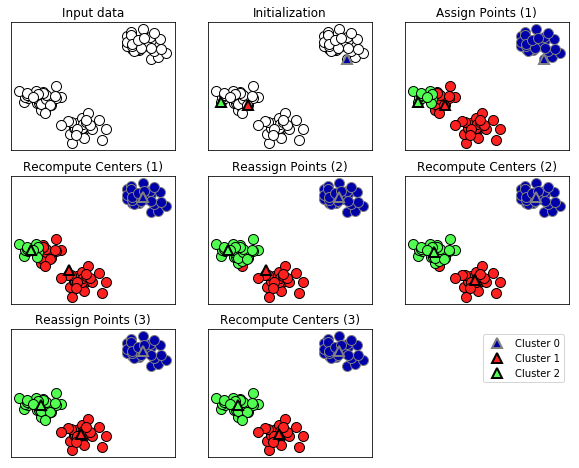

In [ ]:
import mglearn 

mglearn.plots.plot_kmeans_algorithm()

Los centros de los clúster son representados con triángulos, mientras que los puntos de datos son respresentados por círculos. Los colores indican pertenencia a un cluster. Inicializamos el algorítmo con tres puntos de datos aleatoriamente como centros de grupos, suponiendo que estamos buscando tres grupos. Este algorítmo iterativo inicia asignando a cada punto del dataset el centro de clúster más cercano. A continuación, los centros de los clusters se recalculan mediante la media de los puntos asignados. Luego, el proceso se repite dos veces más. Después de la tercera iteración, la asignación de puntos a los centros de clúster se no cambia, por lo que el algoritmo se detiene. 

Para un nuevo dato, el algoritmo `k-means` lo asignará al clúster más cercano. El siguiente ejemplo muestra los límites de los centros de los clusters "aprendidos" de los datos anteriores:

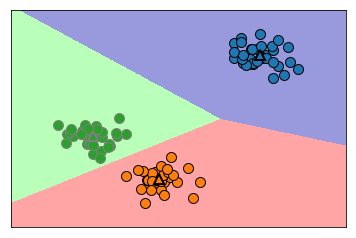

In [ ]:
mglearn.plots.plot_kmeans_boundaries()

## k-means usando scikit-learn

La aplicación del algoritmo de `k-means`con `scikit-learn` es bastante sencilla. Este método lo usaremos en la ilustración del problema tratado en la gráfica anterior. En primer lugar, instanciamos la clase `KMeans`, y establecemos el número de clusters que estamos buscando; en caso de no saberlo, se tiene por defecto que `n_clusters=8`. En segundo lugar, ajustamos el método a los datos. Veamos a continuación estos pasos y una gráfica del dataset inicial:

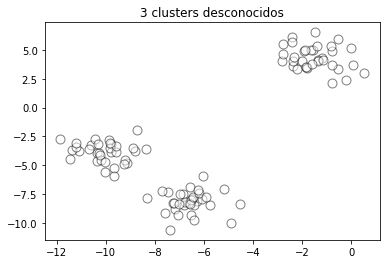

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

plt.scatter(X[:,0],X[:,1], s=80, marker='o',alpha=0.5, edgecolor='black', linewidth='1', facecolor="w")
plt.title("3 clusters desconocidos")

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X);

En la ejecución del algoritmo, a cada dato de entrenamiento en $X$ se le asigna una etiqueta del cluster más cercano. Para consultar estas etiquetas, se puede acceder al atributo `kmeans.labels_`

In [ ]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Como asignamos un valor de 3 al número de clusters a determinar, las etiquetas están numeradas entre 0 y 2. 

Podemos asignar etiquedas de clusters a datos nuevos, usando el método `predict`. Como hemos mencionado, a cada punto se le asigna la etiqueta del centro del cluster más cercano, **sin cambiar el modelo existente**. Al ejecutar el método `predict` sobre los datos de entrenamiento, tendremos la misma salida que en la celda anterior, accediendo al atributo `labels_`:

In [ ]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Advertimos entonces, que el agrupamiento es similar a la clasificación, en el sentido que asignamos a cada dato una etiqueta. No obstante, no tenemos un conocimiento certero de los datos, y por ende, un signicado construido a priori. 

Si corremos el algoritmo nuevamente, podriamos obtener diferentes etiquetas dada la naturaleza aleatoria de la inicialización. 

A continuación se realiza una gráfica de los datos, nuevamente. Los centros de los clusters se encuentran almacenados en el atributo `cluster_centers_`, y se grafican como triangulos:

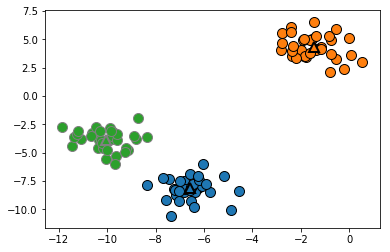

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

Podemos usar, por ejemplo, mas  o menos centros para la construcción del modelo:

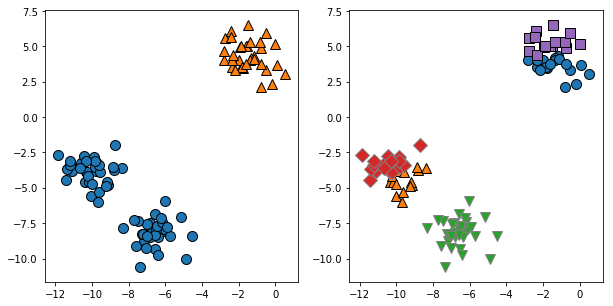

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

## Casos en los que k-means falla:

En `k-means` cada cluster se define solamente por su centro, lo que significa que cada cluster tiene una forma convexa. Debido a esto, `k-means` solo puede capturar formas relativamente simples. `k-means` asume tambien que todos los clusters tienen el mismo "diámetro", de alguna manera; mediante este algoritmo se delimitan las fronteras entre grupo en el punto medio de la distancia entre los centros. Este procedimiento puede tener consecuencias sorprendentes como las que se muestra a continuación:  

Text(0, 0.5, 'Feature 1')

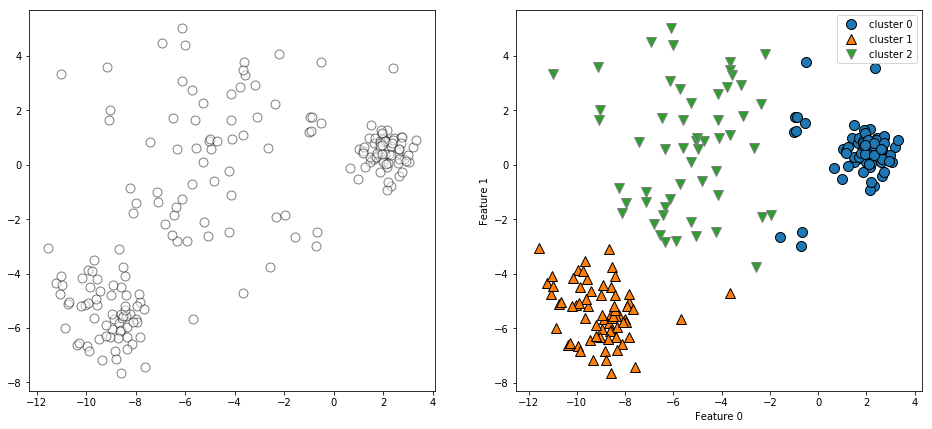

In [ ]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5],
random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

plt.figure(figsize=(16,7))
plt.subplot(121)
plt.scatter(X_varied[:, 0], X_varied[:, 1], s=80, marker='o',alpha=0.5, edgecolor='black', linewidth='1', facecolor="w")
plt.subplot(122)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Esperariamos que la región densa en la parte inferior izquierda, fuese el primer cluster, seguido por la region densa se la esquina superior derecha, y la zona central, la cual es la zona menos densa, correspondería al tercer cluster. En su lugar, los cluster 0 y 1 presentan algunos puntos alejados del la aglomeración principal, alcanzando el centro de la gráfica.

En `k-means` se asume tambien que todas las direcciones son igual de importantes para cada cluster. En la siguiente gráfica se muestra un dataset bidimensional, en donde se obtienen tres grupos claramente diferenciados. No obstante, estos grupos están comprimidos diagonalmente. Dado que `k-means` solo considera la distancia al centro del cluster más cercano, no puede tratar este tipo de datos.

Text(0, 0.5, 'Feature 1')

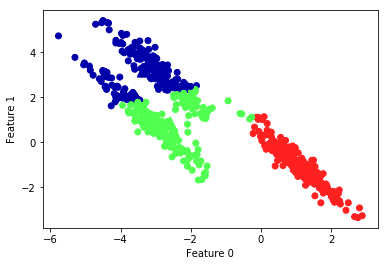

In [ ]:
import numpy as np

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

El desempeño del algoritmo `k-means` es pobre en los casos de distribuciones complejas, como las que vimos en forma de luna:

Text(0, 0.5, 'Feature 1')

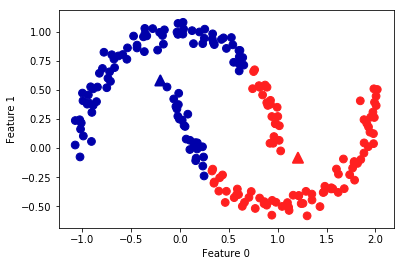

In [ ]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

En este caso, esperamos que el algoritmo pudiese recuperar los dos cachos de luna como clusters separado, sin embargo, no es posible con este tipo de algoritmo. 

Esta situación es una reminiscencia de la discusión en SVM donde usamos una transformación de kernel para proyectar los datos en una dimensión superior donde es posible una separación lineal. Podemos imaginar usar el mismo truco para permitir que k-means descubra límites no lineales.

Una versión de este k-means "kernelizado" se implementa en Scikit-Learn mediante el estimador `SpectralClustering`. Este utiliza el gráfico de los vecinos más cercanos para calcular una representación de mayor dimensionalidad de los datos, y luego asigna etiquetas usando el algoritmo de k-means


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


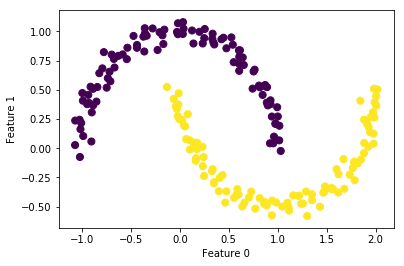

In [ ]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters = 2, affinity = "nearest_neighbors", assign_labels = "kmeans")

labels = model.fit_predict(X)

plt.scatter(X[:,0],X[:,1], c = labels, s = 50, cmap = "viridis")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");


### Pros
1. `k-means` es un algoritmo muy popular debido a que es fácil de comprender e implementar.
2. El tiempo de ejecución es relativamente rápido. 
3. Es escalable facilmente a un gran número de datos.


### Cons

1. Se basa en la inicialización aleatoria de los centroides, lo que significa que la salida adel algoritmo depende de una semilla aleatoria. Para corregir esto, por defecto `scikit-learn` ejecuta el algoritmo 10 veces, y retorna el mejor resultado (entendiéndose por mejor, aquél en el que la suma de las varianzas de los clusters es más pequeña).
2. Es un algoritmo que está restringido a los supuestos realizados sobre la distribución de los grupos (mas o menos simétricos en todas las direcciones).
3. Se necesita especificar un número de centros, que pueden ser desconocido en aplicaciones reales.

# 3. Resumen:


## 3.1. Regresiones:

Para los siguientes modelos, usaremos un dataset real de viviendas en Boston. El objetivo con este dataset consiste en predecir el valor medio de los precios de las casas en diferentes barrios de Boston en los 70s, mediante información como la tasa de asesinatos, proximidad al rio Charles, accesibilidad a las autopistas, etc. 

In [ ]:
from sklearn.model_selection import train_test_split

# load_extended_boston
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Data shape: {}".format(X.shape))

print(type(X))
print(X.shape)

Data shape: (506, 104)
<class 'numpy.ndarray'>
(506, 104)


El dataset load_boston_extended consta de 506 instancias y 104 caracterísiticas.

Ajuste de un conjunto de características o variables a un hiperplano:

$$y=\sum_{i=0}^n w_ix_i$$

La creación de un modelo mediante `sklearn` se realiza mediante el módulo `linear_model` **clase** `LinearRegression`. Por otra parte, el ajuste se realiza mediante el **método** `fit()`, el cual recibe como argumentos los datos de características $X$ y variable objetivo $y$.

A continuación, repasaremos brevemente, cada una de las regresiones estudiadas a lo largo del curso, haciendo hincapié en la noción de objeto, clase, instancia e hiperparámetros del modelo:

In [ ]:
# Multiple Linear Regression.
# Importar clase LinearRegression del módulo linear_model de sklearn.
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### Regresión Ridge

La penalización se hace mediante el hiper parámetro $\alpha$:

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$


Haciendo que sean más pequeños los coeficientes y estabilizando las soluciones aunque a costa de una menor sensibilidad a los datos.

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Score de entrenamiento más bajo que la regresión lineal, pero score de evaluación más alto: Con la regresión lineal creamos un modélo más **sobreajustado**. Con la regresión `Ridge` buscamos modelos más generales a costa de empeorar el redimiento en el grupo de entrenamiento. 

**Conclusión:** El modelo `Ridge` implica un compromiso entre la simplicidad del modelo y el desempeño dentro del conjunto de entrenamiento.

El aumento del hiperparámetro $\alpha$ fuerza a los coeficientes a ser cero, lo que puede empeorar el desempeño del ajuste en los datos de entrenamiento pero mejorar en los de evaluación.


In [ ]:
# Ridge Alpha 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [ ]:
#Ridge alpha 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Al decrecer el hiperparámetro $\alpha$, creamos un modelo menos restrictivo (mejor desempeño en el grúpo de entrenamiento). Comparemos los diferentes valores del hiperparámetro $\alpha$, con el fin de ver su efecto en el ajuste, como lo hemos advertido:

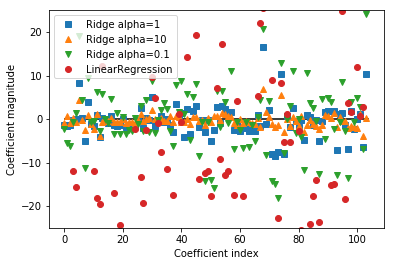

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend();

### Regresión Lasso

Realiza una regularización $L_1$, forzando a que algunos coeficientes sean exactamente cero.

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$

Lo anterior implica que algunas características sean ingnoradas completamente del modelo. Este modelo implica una forma de selección automática de características.


In [ ]:
# Lasso Default alpha=1
import numpy as np
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Vemos un modelo muy simple con un bajo desempeño en ambos grupos (entrenamiento y evaluación). Para evitar el subajuste, disminuimos el valor de $\alpha$.

In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Vemos que el desempeño del modelo mejora. Si fijamos un valor muy bajo del hiperparámetro, eliminamos la regularización y tendemos a hacer un sobrejuste a los datos de 

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


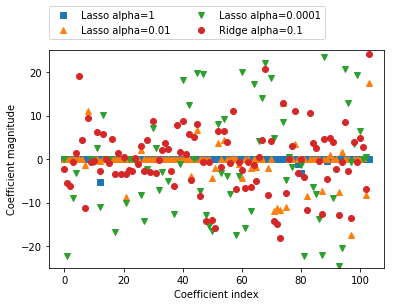

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude");

### Redes elásticas:
A las regresiones que usan una combinación de ambas penalidades ($L_1$ y $L_2$) se les conoce como **ElasticNet** (Redes elásticas) y definimos su error como:
$$\sum (Y_i- \hat Y_i)^2+\alpha \rho \sum |w_i| + \frac{\alpha(1-\rho)}{2}\sum w_i^2. $$

Note que cuando $ \rho=1$ tenemos la regresión Lasso, y con $\rho=0$ tendremos la de Ridge, por tanto en las redes elásticas $0\leq \rho\leq1$.

In [ ]:
# Elasticnet
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.001,l1_ratio=0.999,max_iter=10000,normalize=True).fit(X_train,y_train)

print("Training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic.coef_ != 0)))

Training set score: 0.93
Test set score: 0.78
Number of features used: 48


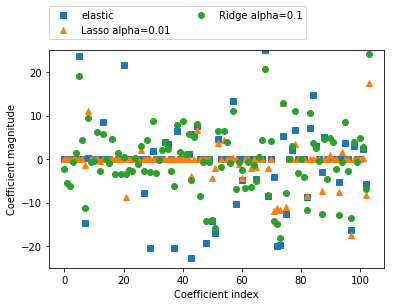

In [ ]:
plt.plot(elastic.coef_, 's', label="elastic")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude");

### Ajuste polinómico:

A continuación realizamos un ajuste polinómico de los ingresos en función del nivel alcanzado en una empresa. 

El primer paso es realizar un preprocesado de los datos, mediante la clase `PolynomialFeatures`, del módulo `preprocessing` de `sklearn`, elevando la característica en cuestión a "características" de grado 0, 1, 2, 3 y 4. Posteriormente, realizamos el ajuste:

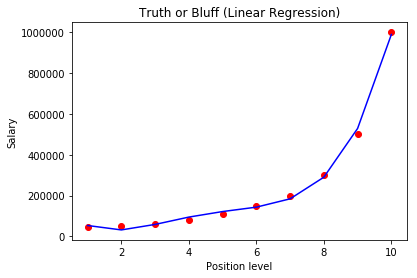

In [ ]:
# Polinomial fit

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Para realizar este ajuste, usamos el método de `curve_fit` de `optimize` de la librería de `scipy`. Definamos primero una función exponencial y posteriormente le agregamos ruido. Finalmente ajustamos nuestro modelo:

In [ ]:
# Curve fit

# definition of exponential function.
def func(x, a, b, c):
...     return a * np.exp(-b * x) + c

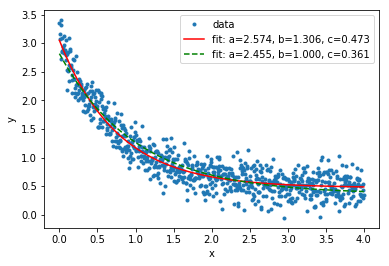

In [ ]:
# Curve fit: exponential

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xdata = np.linspace(0, 4, 800)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(0)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

plt.plot(xdata, ydata, 'o', markersize=3, label='data')
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Ajuste mediante SVM o SVR:

Exportamos el módulo `svm` de `sklearn` y accedemos a la clase `SVR` para instanciar la clase (definimos un objeto). Dentro de este objeto, llamado `estimator`, accedemos al método `fit()` para realizar el ajuste:

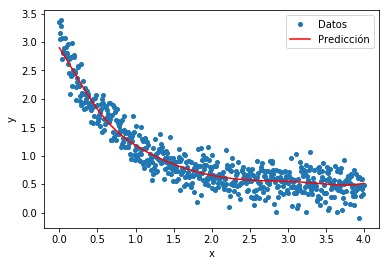

In [ ]:
# Curve fit: exponential

import sklearn.svm as svm  
from sklearn.model_selection import train_test_split

xdata = np.linspace(0, 4, 600)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(0)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
xdata = xdata.reshape(-1,1)

estimator=svm.SVR(kernel='rbf', gamma='auto')
estimator.fit(xdata, ydata)

y_pred = estimator.predict(xdata)

plt.plot(xdata,ydata,'o',markersize=4,label='Datos')
plt.plot(xdata,y_pred, '-', markersize=4,color='r', label='Predicción')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 3.2 Clasificación, Recapitulando

Recordemos el objetivo en la clasificación es predecir una clase, que corresponde a una opción entre una lista predefinida de posibilidades. El problema de clasificación puede separarse en dos categorías:

Clasificación binaria: cuyo proposito consiste en estimar si una instacia corresponde a una clase de dos posibles. La clasificación binaria puede pensarsar como el dar respuesta de si o no a una pregunta; clasificar un paciente como enfermo o sano, respecto a una enfermedad; clasificar un correo como spam o no; etc.

Clasificación multi-clase: en donde se estima si una instacia corresponde a una clase de mas de dos clases posibles. Algunos ejemplos de clasificación multi-clases en ML consiten en la clasificación de plantas de diferentes especies; clasificación para predecir el lenguaje de una determinada página Web; etc.

Recordemos que el problema de regresión consiste en la determinación de una una variable objetivo continua, mientras que en el problema de clasificación se busca poner un conjunto de etiquetas finitas a las instancias de la tabla.

Durante el curso vimos varios algorítmos para ésta tarea, también algunas metricas para medir su efectividad.

Metodologías como la medida de la precisión, el recall y el score f_1. Los cuales son de especial cuidado si tenemos datasets desequilibrados en los cuales el accuracy puede ser una metrica muy engañosa.

## 3.2.1 SVC

En SVC escogemos la recta (hiperplano) que maximiza el margen, entendiendo como el margen la distacia maxima que hay entre los puntos de las dos clases. Los puntos que están mas cerca de la frontera (línea punteada) se conocen como los vectores de soporte, estos pueden quedar sobre la línea de frontera o fuera de ella. 

![](https://camo.githubusercontent.com/cb709bb9432f3e1fc7b3ca19579d0424fbf466bc/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3330302f302a306f38784941346b33675855444346552e706e67)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# copiando el archivo mlutils.py en la carpeta local
!wget "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py"
import mlutils

--2019-10-05 11:18:42--  https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10691 (10K) [text/plain]
Saving to: ‘mlutils.py’

mlutils.py          100%[===================>]  10.44K  --.-KB/s    in 0s      

2019-10-05 11:18:42 (117 MB/s) - ‘mlutils.py’ saved [10691/10691]



In [ ]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 9.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=440c69f700541d04489f42334e82288fd0b429d7b562ed784d1970caaa8edfe8
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [ ]:
X,y = make_blobs(400, centers=2, cluster_std=1, random_state=0)
X.shape, y.shape

((400, 2), (400,))

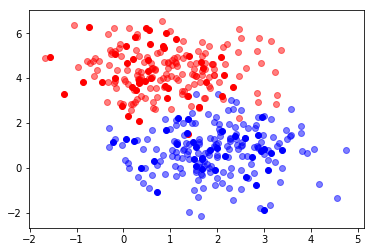

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="red", alpha=0.5)
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="blue", alpha=0.5)

plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color="red")
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color="blue");

number of support vectors 27


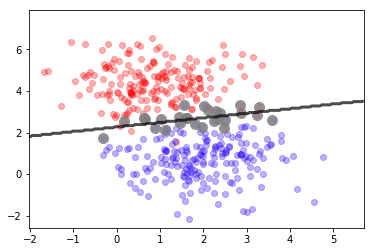

In [ ]:
from  sklearn.svm import SVC
sv = SVC(kernel='linear')
sv.fit(X_train,y_train)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_));

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


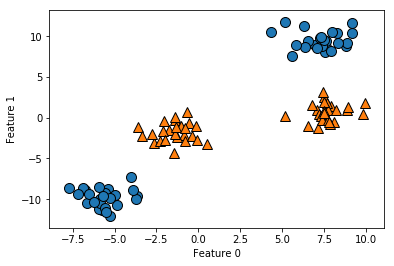

In [ ]:
import mglearn
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

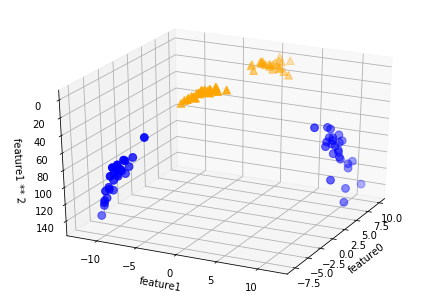

In [ ]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='orange', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

#### Usando los kernel
Igual que para la regresión, los kernel disponibles en sklearn son lineal ('linear'), polinómico ('poly'), función de base radial ('rbf'), sigmoide('sigmoid'). El hiperparámetro $\gamma$ está asociado a los coeficientes de los kernel. Veamos por ejempĺo en el caso del kernel de base radial (RBF) $K_{rbf}=\exp(-\gamma |x_1-x_2|^2)$ la dependencia de $\gamma$ en la clasificación. En este caso lo podemos interpretar como cuanto de cercanos han de estar dos puntos para considerarlos similares.

Por tanto al aumentar $\gamma$ estaremos aumentando la complejidad del modelo y por tanto seremos más dados al overfitting.



score_train 0.996875
score_test 1.0
number of support vectors 47


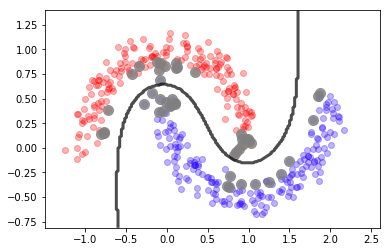

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

X,y = make_moons(400, noise=0.1, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)
sv = SVC(gamma=1)
sv.fit(X_train,y_train)
print ("score_train",sv.score(X_train,y_train))
print ("score_test",sv.score(X_test,y_test))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print ("number of support vectors", len(sv.support_vectors_))

## 3.2.2. Regresión Logística:


Como se ha mencionado, algunos algoritmos de regresión pueden ser usados para el problema de clasificación. La Regresión Logística se usa, comunmente, para determinar la probabilidad de que una instancia pertenezca a una clase particular.

Supongamos que tenemos dos clases: clase A (clase positiva, etiquetada como 1) y clase B (clase negativa, etiquetada como 0). Si estimamos una probabilidad $\hat{p}$ en regresión logística, tenemos entonces que el problema de clasificación binario se trata de la siguiente forma:

$$\begin{equation*}
\hat{y} = \begin{cases}
1 \; {si} \; \hat{p}\geq0.5\\
0 \; {si} \; \hat{p}\lt0.5
\end{cases}
\end{equation*}$$

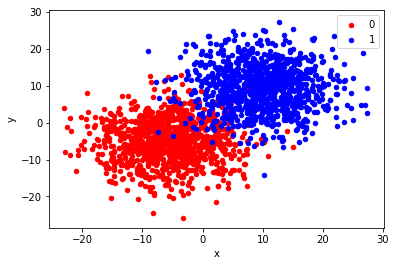

Train set: (1600, 2) (1600,)
Test set: (400, 2) (400,)


[(-22.981715497289997, 27.37181699382255),
 Text(0, 0.5, '$X_2$'),
 (-25.814445291719665, 27.365133706091257),
 Text(0.5, 0, '$X_1$'),
 None]

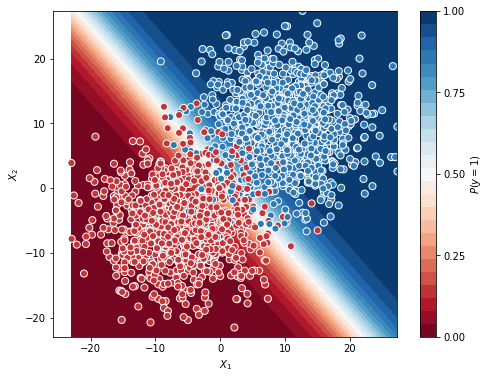

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import DataFrame

# Generación de un dataset de clasificación 2d de nubes de puntos.
X, y = make_blobs(n_samples=[1000,1000], centers=None, n_features=2, cluster_std=6, random_state=202)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
# División de los datos en subconjuntos de entrenamiento/evaluación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Ajuste del modelo.
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[1], X.max(0)[1]), ylim=(X.min(0)[0], X.max(0)[0]),
       xlabel="$X_1$", ylabel="$X_2$")

Recuerde tener mucho cuidado pues la regresión logística no es más que una regresión lineal, si los datos tienen relaciones no lineales será muy difícil para éste típo de algorítmo plantear una solución adecuada.

## 3.2.3 KNN
El algoritmo de k-NN es, sin lugar a dudas, el algoritmo más simple de ML. El modelo consiste solo en el almacenamiento en memoria de los datos de entrenamiento. Mediante este algoritmo, la clase de una instacia se predice al buscar dentro de los datos los vecinos más cercanos a la instacia.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


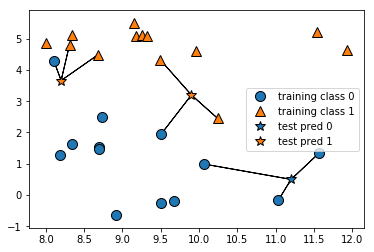

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3);

Entre más vecinos escojamos, la frontera se suaviza. Una frontera de desición suave. En otras palabras, el uso de pocos vecinos resulta en complejidades mayores de los modelos y el uso de muchos vecinos resulta en complejidades menores. En el caso extremo en que consideramos el número de vecinos igual al número de datos de la muestra, cada instancia nueva tendrá el mismo número de vecinos (toda la muestra) y la predicción será siempre la misma: la clase mas frecuente.

Veamos entonces si podemos encontrar una conexión entre la complejidad del modelo y una mayor generalización del mismo, como se señala en el párrafo anterior.

## 3.2.5 Bosques aleatorios.

Llamamos método de ensamble a los métodos en los cuales se unen diferentes tipos de algorítmos o el mísmo algorítmo multiples veces con el fin de crear un predictor más robusto.

El método de bosques aleatorios no implementa un algorítmo de ML nuevo, como dijimos, en realidad es un ensamble de árboles de desición en el cual el entrenamiento se realiza mediante bootstraping y la desición final se toma con la moda (para clasificación) o la media (para regresión) de las predicciones de cada árbol.
![](https://colab.research.google.com/github/diplomado-bigdata-machinelearning-udea/Curso1/blob/master/s10/s10.ipynb#scrollTo=T6VXKRbK8dG9)


Existen varias ventajas de usar un bosque aleatorio:

Se usa bootstraping de los datos de entrenamiento, ésto hace que sea difícil sobreajustar los árboles, por el contrario ésto hace que cada árbol disminuya su varianza y al usar el metodo de "votación" se cancelan los sesgos. Los bosques aleatorios son excelentes en el bias-variance tradeoff.
Es un método muy robusto respecto al ruido en los datos.
Puede tenerse la importancia relativa de las carácterísticas, lo cual nos permite hacer selección de las mísmas para hacer reducción dimensional.
Puede entrenarse en paralelo cada árbol.
Eso si, tiene algunas desventajas:

Al ser un método de ensamble puede ser muy costoso computacionalmente, tanto para entrenamiento como para predicción.
Su interpretabilidad no es tan simple como la de un sólo árbol.

<p><img alt="Colaboratory logo" height="300px" src="https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s10/desTreeAnimals.png" align="center" hspace="10px" vspace="0px"></p>
